## Using the Titanic dataset from [data](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('titanic_train.csv')

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean Continuous Data

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### Combine SibSp and Parch

<Figure size 432x288 with 0 Axes>

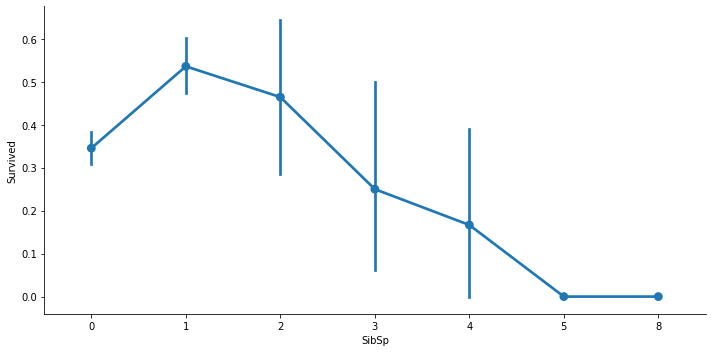

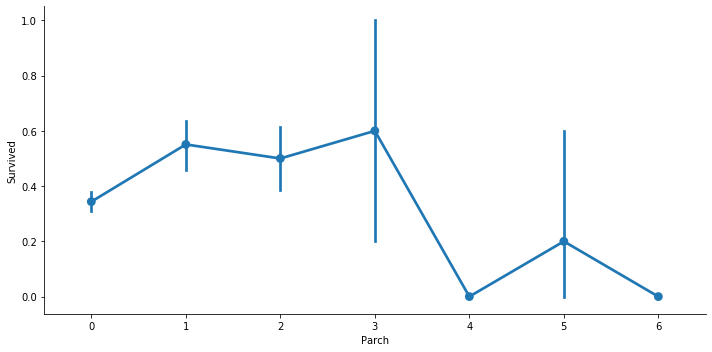

In [8]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data =data, kind='point', aspect=2 )

### Drop unnnecessary variables

In [9]:
data.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


### Clean categorical variables

#### Fill in missing and create indicator for Cabin

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

Survival rate when cabin is missing is 0.299854 and when cabin is not missing is 0.666667

In [18]:
data['cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Convert sex to numeric

In [20]:
gender = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(gender)
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


### Drop unnecessary variables

In [22]:
data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1, inplace = True)

In [25]:
data.head()

,Survived,Pclass,Sex,Age,Fare,cabin_ind
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


### Write out cleaned data

In [24]:
data.to_csv()

',Survived,Pclass,Sex,Age,Fare,cabin_ind\r\n0,0,3,0,22.0,7.25,0\r\n1,1,1,1,38.0,71.2833,1\r\n2,1,3,1,26.0,7.925,0\r\n3,1,1,1,35.0,53.1,1\r\n4,0,3,0,35.0,8.05,0\r\n5,0,3,0,29.69911764705882,8.4583,0\r\n6,0,1,0,54.0,51.8625,1\r\n7,0,3,0,2.0,21.075,0\r\n8,1,3,1,27.0,11.1333,0\r\n9,1,2,1,14.0,30.0708,0\r\n10,1,3,1,4.0,16.7,1\r\n11,1,1,1,58.0,26.55,1\r\n12,0,3,0,20.0,8.05,0\r\n13,0,3,0,39.0,31.275,0\r\n14,0,3,1,14.0,7.8542,0\r\n15,1,2,1,55.0,16.0,0\r\n16,0,3,0,2.0,29.125,0\r\n17,1,2,0,29.69911764705882,13.0,0\r\n18,0,3,1,31.0,18.0,0\r\n19,1,3,1,29.69911764705882,7.225,0\r\n20,0,2,0,35.0,26.0,0\r\n21,1,2,0,34.0,13.0,1\r\n22,1,3,1,15.0,8.0292,0\r\n23,1,1,0,28.0,35.5,1\r\n24,0,3,1,8.0,21.075,0\r\n25,1,3,1,38.0,31.3875,0\r\n26,0,3,0,29.69911764705882,7.225,0\r\n27,0,1,0,19.0,263.0,1\r\n28,1,3,1,29.69911764705882,7.8792,0\r\n29,0,3,0,29.69911764705882,7.8958,0\r\n30,0,1,0,40.0,27.7208,0\r\n31,1,1,1,29.69911764705882,146.5208,1\r\n32,1,3,1,29.69911764705882,7.75,0\r\n33,0,2,0,66.0,10.5,0\r\n34,0,